## Build a deep learning model to classify the mnist digits dataset with Batch Normalization.

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [5]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
# Build the CNN model with Batch Normalization
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 54s 72ms/step - loss: 0.0143 - accuracy: 0.9955 - val_loss: 0.0352 - val_accuracy: 0.9905
Epoch 2/5
750/750 [==============================] - 61s 81ms/step - loss: 0.0123 - accuracy: 0.9961 - val_loss: 0.0311 - val_accuracy: 0.9921
Epoch 3/5
750/750 [==============================] - 55s 74ms/step - loss: 0.0095 - accuracy: 0.9970 - val_loss: 0.0303 - val_accuracy: 0.9922
Epoch 4/5
750/750 [==============================] - 55s 73ms/step - loss: 0.0097 - accuracy: 0.9968 - val_loss: 0.0428 - val_accuracy: 0.9893
Epoch 5/5
750/750 [==============================] - 57s 76ms/step - loss: 0.0080 - accuracy: 0.9975 - val_loss: 0.0425 - val_accuracy: 0.9891


In [9]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0351 - accuracy: 0.9892
Test accuracy: 0.9891999959945679


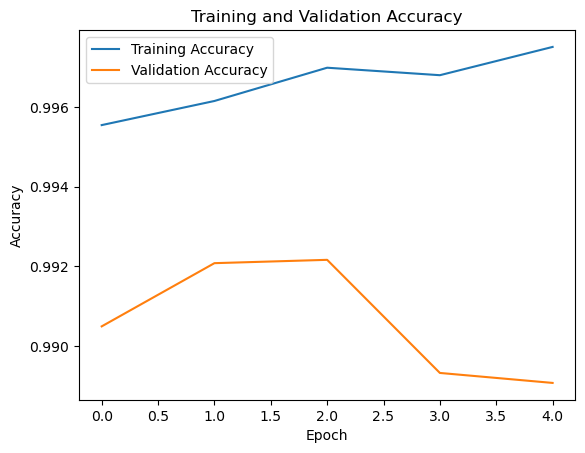

In [12]:
# Plot training and validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

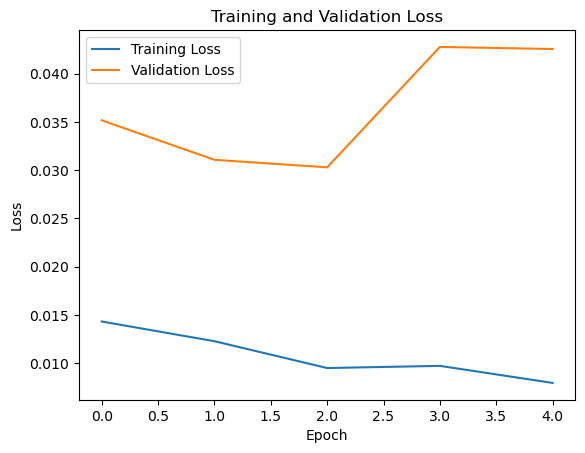

In [13]:
# Plot training and validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 

# 

## Build a Feed Forward Neural Network for any problems with keras tuner.

In [14]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from keras_tuner.tuners import RandomSearch

In [17]:
# Define the model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))

    # Tune the number of units in the first dense layer
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(Dense(units=hp_units, activation='relu'))

    # Tune the number of dense layers
    hp_layers = hp.Int('num_layers', min_value=1, max_value=5)
    for _ in range(hp_layers):
        model.add(Dense(units=hp_units, activation='relu'))

    model.add(Dense(10, activation='softmax'))

    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [18]:
# Instantiate the Keras Tuner RandomSearch tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Number of hyperparameter combinations to try
    directory='tuner_logs',  # Directory to save the logs
    project_name='mnist_tuner'
)

In [19]:
# Display search space summary
tuner.search_space_summary()


Search space summary
Default search space size: 3
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [20]:
# Perform the hyperparameter search
tuner.search(train_images, train_labels, epochs=5, validation_split=0.2)

Trial 5 Complete [00h 01m 44s]
val_accuracy: 0.9609166383743286

Best val_accuracy So Far: 0.9744166731834412
Total elapsed time: 00h 08m 46s


In [21]:
# Perform the hyperparameter search
tuner.search(train_images, train_labels, epochs=5, validation_split=0.2)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

In [22]:
# Train the model
best_model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = best_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2320 - accuracy: 0.9295 - val_loss: 0.1216 - val_accuracy: 0.9633
Epoch 2/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1113 - accuracy: 0.9672 - val_loss: 0.1131 - val_accuracy: 0.9696
Epoch 3/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0808 - accuracy: 0.9762 - val_loss: 0.1161 - val_accuracy: 0.9691
Epoch 4/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0636 - accuracy: 0.9818 - val_loss: 0.0975 - val_accuracy: 0.9713
Epoch 5/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0537 - accuracy: 0.9838 - val_loss: 0.1182 - val_accuracy: 0.9715
Epoch 6/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0437 - accuracy: 0.9869 - val_loss: 0.1146 - val_accuracy: 0.9697
Epoch 7/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0379 - accuracy: 0.9883 - val_loss: 0.1004 -